Importing all the modules required for data extraction, data analysis and visulization

In [1]:
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
file_path = 'foods.txt'

Reading the text file into a list of dictionaries objects in python so that we can easily pass it into the Pandas dataframe

In [3]:
def read_reviews_to_dict(file_path):
    result_dict = []
    current_review = {}

    with open(file_path, 'rt', encoding='latin-1') as file:
        for line in file:
            line = line.strip()

            # If the line is empty, it means a new product review begins
            if not line:
                result_dict.append(current_review)
                current_review = {}
            else:
                # Split each line into key and value if the line contains ': '
                if ': ' in line:
                    key, value = line.split(': ', 1)
                    current_review[key] = value
                else:
                    # Handle lines that don't match the expected format
                    print(f"Skipping line: {line}")

    return result_dict

# Use the function to read the file into a list of dictionaries
reviews_list = read_reviews_to_dict(file_path)
df=pd.DataFrame(reviews_list)


Skipping line: 88 years old. ...
Skipping line: ...creative powers b...
Skipping line: School Princi...
Skipping line: School Princi...
Skipping line: I am a voracious reader/li...
Skipping line: School Princi...
Skipping line: ...creative powers b...


In [4]:
print(df)

       product/productId   review/userId               review/profileName  \
0             B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1             B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2             B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3             B000UA0QIQ  A395BORC6FGVXV                             Karl   
4             B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...                  ...             ...                              ...   
568449        B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450        B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451        B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452        B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453        B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

       review/helpfulness review/score review/time  \
0                    

Checking if my data has null values it has no null values

In [5]:
print(df.isnull().sum())

product/productId     0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64


The following step involves converting all the text fields in the pandas dataframe to lowercase. Then we check for the following null or none values present in all the related formats across the column

In [6]:
df=df.applymap(lambda x: x.lower() if isinstance(x,str) else x)#

def checkweirddataandnull(name):
    print('='*30)
    print('Column name: '+name)
    if df[name].dtypes == 'O':
        display(df[(df[name] == 'nan')|(df[name] == 'NaN')|
                     (df[name] == 'N/A')|(df[name] == '0')|
                     (df[name] == '')|(df[name] == '-1')|
                     (df[name] == 'null')|(df[name] == 'Null')|
                     (df[name] == 'NA')|(df[name] == 'na')|
                     (df[name] == 'none')|(df[name] == 'unknown')])
    else:
        display(df[df[name] < 0])
for i in df.columns:
    checkweirddataandnull(i)

C:\Users\asus\AppData\Local\Temp\ipykernel_6460\2845945467.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: x.lower() if isinstance(x,str) else x)#


Column name: product/productId


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/userId


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/profileName


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
8883,b001eq5eqe,a3m84vmtycg5l3,none,0/0,5.0,1328313600,just like at a restaurant,i've always enjoyed the decaf at a little ital...
10616,b002dhn956,a1lsyr30xw7cft,none,1/2,5.0,1291680000,awesome,this is 72 for the price of like 24 at the gro...
17634,b000ihxml4,am1reelxvxvua,unknown,2/2,1.0,1324425600,dog treats,i did get a good laugh out of my one bone that...
25509,b000lkzb4y,a36bvyd0nt7z0f,nan,0/0,5.0,1314576000,these are the best mints and no aspartame or bht,i was so shocked to find out that almost all g...
29042,b000mprp4c,a1djv0xtccsz8f,nan,0/0,5.0,1342915200,best tea ever,"addicted to this bright, strong tea for breakf..."
...,...,...,...,...,...,...,...,...
522215,b001d9yve8,a20djiscaclf8j,nan,1/2,5.0,1231286400,great tea,i love this tea! a lot of green teas are too ...
525411,b001eppfbe,a2iaa3aodjsguu,none,0/0,5.0,1324857600,tao of tea,tea is light and very upgrade tea. there are ...
537423,b0034efiyc,aozhn8bhn0y1o,nan,0/0,5.0,1348099200,walnut and date,these were the best nutrient bars i have had e...
539740,b000fixyb4,a1djv0xtccsz8f,nan,0/0,4.0,1271030400,we like it,"good portion size (7.5 oz), not too carb-heavy..."


Column name: review/helpfulness


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/score


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/time


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/summary


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
119242,b000e1dstk,a2oeac7j61wo8w,hollis mccollum,0/0,5.0,1310774400,none,this was avaiable at the store. but they quit ...
144396,b001tnxszg,a3jybmjjwx5abl,rbeccaboopsie,3/4,5.0,1333324800,none,i have been drinking mate for years and this i...
223957,b004h6mv28,a11ojj3sjk5p5c,nancy m. clement caron,1/1,4.0,1329782400,nan,i love this as a nice afternoon drink rather t...
463577,b004qda8wc,a11ojj3sjk5p5c,nancy m. clement caron,1/1,4.0,1329782400,nan,i love this as a nice afternoon drink rather t...
557818,b0021l9xk4,a1k4id6vp1vl0i,narf,0/8,5.0,1295654400,unknown,i never received the product. i e-mailed your...


Column name: review/text


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


The above output tells us that certain rows in the columns 'review/profilename' and 'review/summary' have different null values and then we convert them to 'annonymous' for the 'review/profilename' column and to 'no summary' for the 'review/summary' column respectively

In [7]:
df['review/profileName']=df['review/profileName'].replace('nan','annonymous')
df['review/profileName']=df['review/profileName'].replace('n/a','annonymous')
df['review/profileName']=df['review/profileName'].replace('null','annonymous')
df['review/profileName']=df['review/profileName'].replace('na','annonymous')
df['review/profileName']=df['review/profileName'].replace('none','annonymous')
df['review/profileName']=df['review/profileName'].replace('unknown','annonymous')
df['review/profileName']=df['review/profileName'].replace('narf','annonymous')

df['review/summary']=df['review/summary'].replace('nan','no summary')
df['review/summary']=df['review/summary'].replace('n/a','no summary')
df['review/summary']=df['review/summary'].replace('null','no summary')
df['review/summary']=df['review/summary'].replace('na','no summary')
df['review/summary']=df['review/summary'].replace('none','no summary')
df['review/summary']=df['review/summary'].replace('unknown','no summary')

Running the function again to see if there are still any values existing in the form which we have to change

In [8]:
for i in df.columns:
    checkweirddataandnull(i)

Column name: product/productId


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/userId


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/profileName


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/helpfulness


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/score


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/time


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/summary


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


Column name: review/text


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text


The above output shows that all missing values are converted to standard texts

DAropping the duplicate and N/A values from the dataframe

In [9]:
df=df.drop_duplicates()
df=df.dropna()

This step involves the cleaning of data by using the following function:-

1- I remove the html tags using the BeautifulSoup module

2- I convert all the texts in lowercase

3- I drop all the punctutations

4- I drop all the stopwords

All the three steps are done to generate clear and effective wordclouds for each rating which would help us to determine the most occuring words used for respective ratings
Also since our dataset is very large it takes a huge computation time to do exploratory data analysis and model fitting on the entire dataset.
Hence I created a random sample of 10,000 rows of our dataset to reduce the computation time. My sample dataset is 'df2' which I use for EDA and model fitting.

In [10]:
nltk.download('stopwords')
stopwords_list=set(stopwords.words('english'))

def cleaning_text(text):
    text=BeautifulSoup(text,'html.parser').get_text() #removing html tags 
    text=text.lower() #converting everything to lowercase
    text=text.translate(str.maketrans('','',string.punctuation)) #dropping punctuation
    text=' '.join([word for word in text.split() if word not in stopwords_list]) #dropping stop words

    return text


df2=df.sample(10000)
df2['review/text'] = df2['review/text'].apply(cleaning_text)
df2['review/summary'] = df2['review/summary'].apply(cleaning_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\asus\AppData\Local\Temp\ipykernel_6460\3366737560.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text=BeautifulSoup(text,'html.parser').get_text() #removing html tags


Generating wordclouds for each rating

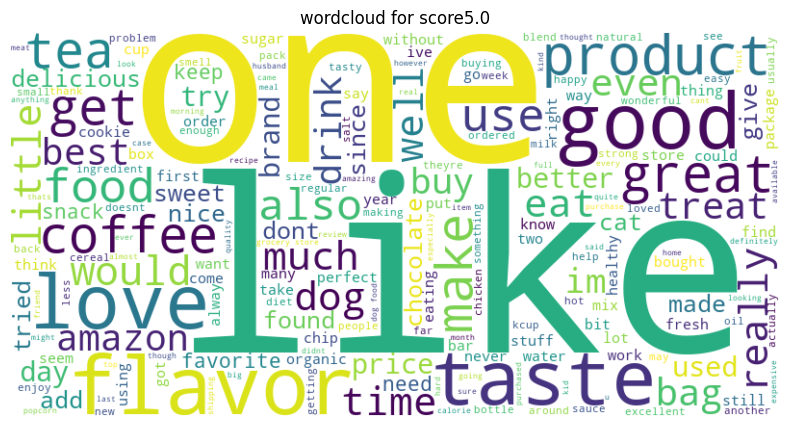

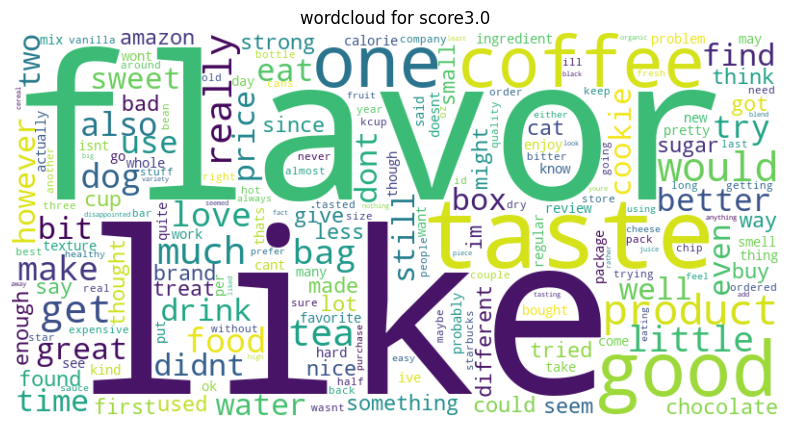

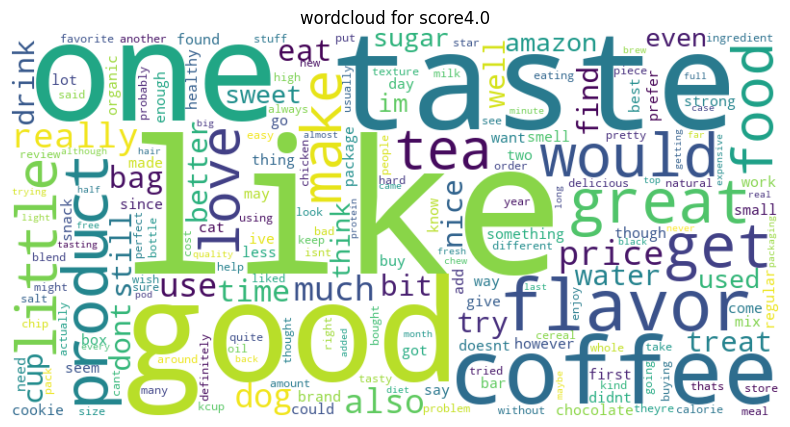

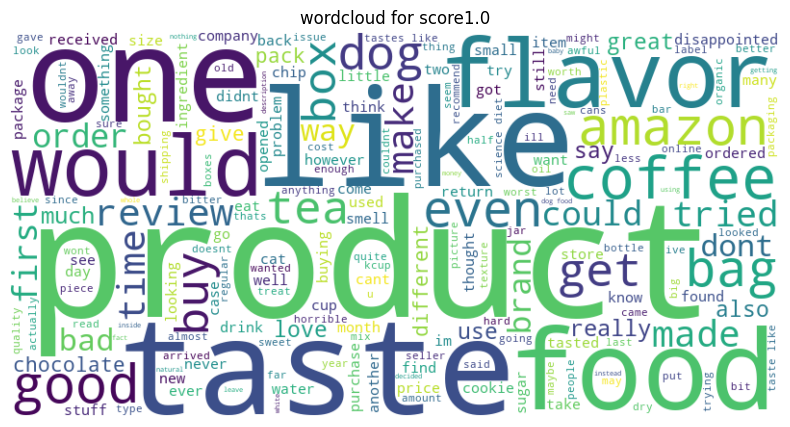

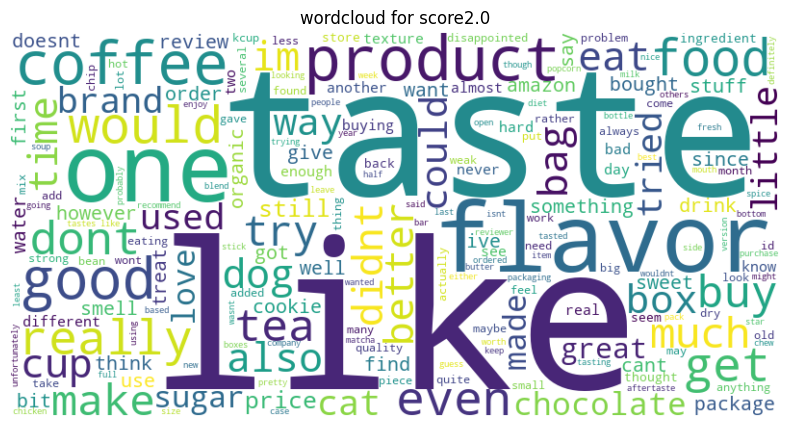

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
score_wordclouds={}
for score in df2['review/score'].unique():
    text_for_score=''.join(df2[df2['review/score']==score]['review/text'])
    score_wordclouds[score]=text_for_score

for score, text_for_score in score_wordclouds.items():
    stopwords_list=set(stopwords.words('english'))
    stopwords_list.update(['br','href'])
    
    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords_list).generate(text_for_score)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('wordcloud for score{}'.format(score))
    plt.axis('off')
    plt.show()


Visualizing the frequency of all the 5 different reviews (1,2,3,4,5) as it is evident that the rating 5 occurs the most and the rating 2 occurs the least 

C:\Users\asus\AppData\Local\Temp\ipykernel_6460\3693290698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['review/score'], palette='pastel')


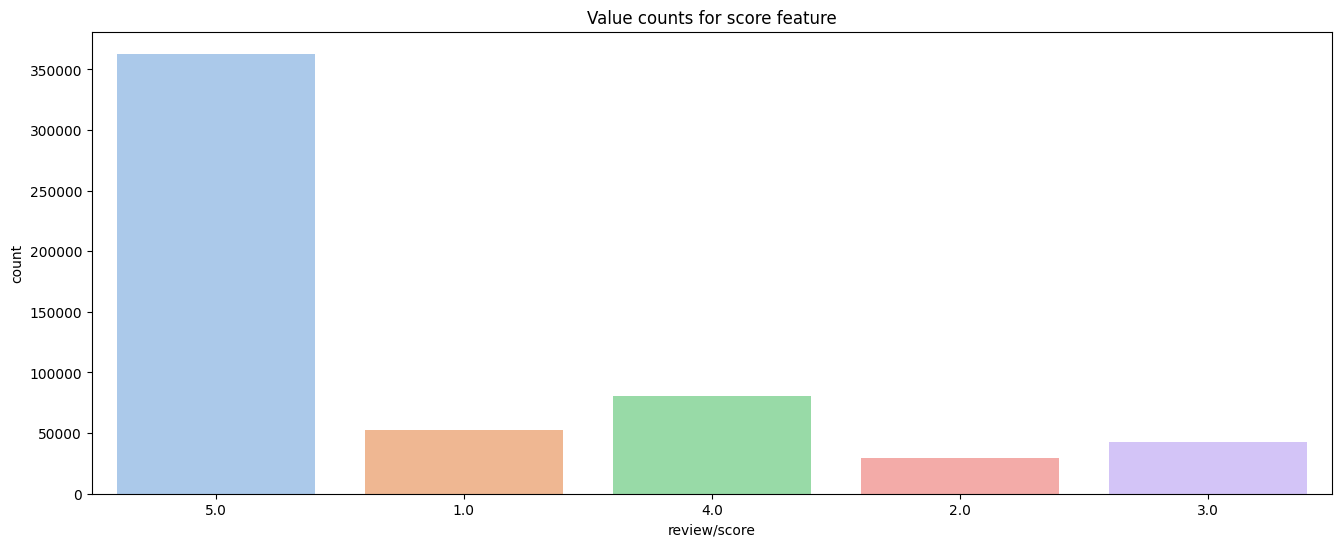

In [12]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['review/score'], palette='pastel')
plt.title('Value counts for score feature')
plt.show()

Creating a word count columns for the words in both 'review/text' and 'review/summary' columns. Then I will filter out the rows having more than 1000 words in the 'review/text' or the 'review/summary' fields. 

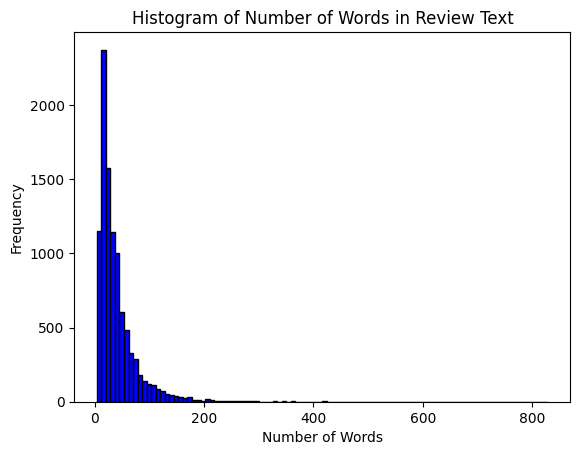

In [13]:
df2['word_count'] = df2['review/text'].apply(lambda x: len(word_tokenize(x)))
# Plot histogram
plt.hist(df2['word_count'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Review Text')
plt.show()

In [14]:
df2=df2[df2['word_count']<=1000]

In [15]:
df2['word_count_summary'] = df2['review/summary'].apply(lambda x: len(word_tokenize(x)))

In [16]:
df2=df2[df2['word_count_summary']<=1000]

In [17]:
df2

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,word_count,word_count_summary
312729,b001sb1uqs,a3hwy4ideakoid,penny b.,2/2,5.0,1271635200,best canned tomatoes,specifically looked tomatoes recommendation fr...,19,3
432643,b003mwbfxy,a1a763q8427zgy,mawrtyr,5/5,3.0,1296345600,expensive worked,took foster cat almost one year ago tried almo...,95,2
391514,b002nsfcak,a26bua30uqahgt,amyjlny,0/0,5.0,1286928000,delicious,thirty something love veggie wedgies wrong lik...,50,1
546840,b0018ceabe,a2tsixfqxqbfsl,j. coyle,1/1,5.0,1300492800,great value great dog food,really good dog food really good price way che...,16,5
245582,b004oaz36i,a2n4uo6du3bemv,janice willis,1/1,5.0,1319846400,yum,husband enjoyed flavorful coffees much would h...,17,1
...,...,...,...,...,...,...,...,...,...,...
305329,b005pijqc0,a1retze165ihp8,"judy quan ""run26_2chick""",5/6,3.0,1162512000,cytomax drink good cranberry grapefruit flavor...,cytomax good recovery drink doesnt much sugar ...,45,9
34044,b00412w76s,a2bs1xzlsi5ftk,lulu,0/0,5.0,1350691200,great tea great price,tea comes bags inside large foil lined pouch 2...,22,4
457736,b001ujjxyy,a3b7d0vawlislv,c. jaeger,0/0,5.0,1314489600,passes 6 yearold test,taste color closer popular nonorganic brand br...,23,4
66047,b0007a0aqw,a108xvmajd1wyc,susan,0/0,4.0,1276992000,great size dogs favorite,bought treats size go lot treats walks dog lea...,52,4


Applying the Naive Bayes model for predicting our score basis 2 features 'review/text' and 'review/summary'. We split the data into 80:20 ratio with 80 percent of the data used for training and 20 percent used for testing. Since I was not satisfied with the accuracy of the model (it was ranging from 65-67%) I went on to try different models.

In [18]:
X=df2[['review/summary','review/text']]
y=df2['review/score']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert integer values in 'review/score' to string
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Text feature extraction
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['review/summary'] + ' ' + X_train['review/text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['review/summary'] + ' ' + X_test['review/text'])

# Naive Bayes model (Multinomial Naive Bayes for text classification)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred_naive_bayes = naive_bayes_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_naive_bayes_percentage = accuracy_naive_bayes * 100

print(f'Naive Bayes Accuracy: {accuracy_naive_bayes_percentage:.2f}%')

# Display classification report for Naive Bayes
print(classification_report(y_test, y_pred_naive_bayes))

Naive Bayes Accuracy: 65.60%
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       186
         2.0       0.00      0.00      0.00        89
         3.0       0.00      0.00      0.00       144
         4.0       0.00      0.00      0.00       269
         5.0       0.66      1.00      0.79      1312

    accuracy                           0.66      2000
   macro avg       0.13      0.20      0.16      2000
weighted avg       0.43      0.66      0.52      2000



c:\Users\asus\anaconda3\envs\MLAI\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\MLAI\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\envs\MLAI\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I decided to use the decision tree classsifier model for the same features- 'review/text' and 'review/summary' again the accuracy was very low around 58 percent

In [19]:
from sklearn.tree import DecisionTreeClassifier

# ...

# Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set using Decision Tree
y_pred_decision_tree = decision_tree_model.predict(X_test_tfidf)

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_decision_tree_percentage = accuracy_decision_tree * 100

print(f'Decision Tree Accuracy: {accuracy_decision_tree_percentage:.2f}%')

# Display classification report for Decision Tree
print(classification_report(y_test, y_pred_decision_tree))

Decision Tree Accuracy: 62.40%
              precision    recall  f1-score   support

         1.0       0.43      0.44      0.44       186
         2.0       0.19      0.15      0.16        89
         3.0       0.25      0.25      0.25       144
         4.0       0.25      0.20      0.22       269
         5.0       0.77      0.81      0.79      1312

    accuracy                           0.62      2000
   macro avg       0.38      0.37      0.37      2000
weighted avg       0.60      0.62      0.61      2000



I used the Random forest classifier model. This model gave me the highest 

In [20]:
from sklearn.ensemble import RandomForestClassifier

# ...

# Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set using Random Forest
y_pred_random_forest = random_forest_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_random_forest_percentage = accuracy_random_forest * 100

print(f'Random Forest Accuracy: {accuracy_random_forest_percentage:.2f}%')

# Display classification report for Random Forest
print(classification_report(y_test, y_pred_random_forest))

Random Forest Accuracy: 68.60%
              precision    recall  f1-score   support

         1.0       0.86      0.23      0.36       186
         2.0       0.50      0.01      0.02        89
         3.0       0.75      0.06      0.12       144
         4.0       1.00      0.04      0.07       269
         5.0       0.68      1.00      0.81      1312

    accuracy                           0.69      2000
   macro avg       0.76      0.27      0.28      2000
weighted avg       0.74      0.69      0.58      2000



Now I use logistic regression and with this model and logistic regression is giving me the highest accuracy.

In [21]:
from sklearn.linear_model import LogisticRegression

# ...

# Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Make predictions on the testing set using Logistic Regression
y_pred_logistic_regression = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_logistic_regression_percentage = accuracy_logistic_regression * 100

print(f'Logistic Regression Accuracy: {accuracy_logistic_regression_percentage:.2f}%')

# Display classification report for Logistic Regression
print(classification_report(y_test, y_pred_logistic_regression))

Logistic Regression Accuracy: 70.65%
              precision    recall  f1-score   support

         1.0       0.71      0.40      0.51       186
         2.0       0.67      0.02      0.04        89
         3.0       0.58      0.15      0.24       144
         4.0       0.36      0.11      0.17       269
         5.0       0.72      0.98      0.83      1312

    accuracy                           0.71      2000
   macro avg       0.61      0.33      0.36      2000
weighted avg       0.66      0.71      0.64      2000

